### Pydantic State Schema

We have seen TypeDict or DataClass for State Schema will not enforce this. But it is a suggestion (type hint) only.

If we need to enforce the type - we need to use *Pydantic*

*Pydantic* is the most widely used data validation library in Python

In [1]:
from langgraph.graph import StateGraph, START, END
from dataclasses import dataclass
from typing import TypedDict, Literal
from pydantic import BaseModel
import random

In [2]:
class PydanticState(BaseModel):
    name: str

In [3]:
def example_node(state: PydanticState) -> PydanticState:
    print(state.name)
    return state

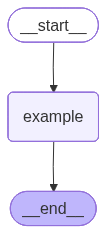

In [4]:
# define the graph
graph = StateGraph(PydanticState)

# add nodes
graph.add_node("example", example_node)

# add edges
graph.add_edge(START, "example")
graph.add_edge("example", END)

# create workflow
workflow = graph.compile()
workflow

In [7]:
# run the workflow
initial_state = {'name': 'Srini'}
final_state = workflow.invoke(initial_state)
final_state

Srini


{'name': 'Srini'}

In [8]:
initial_state = {'name': 1234}
final_state = workflow.invoke(initial_state)
final_state

ValidationError: 1 validation error for PydanticState
name
  Input should be a valid string [type=string_type, input_value=1234, input_type=int]
    For further information visit https://errors.pydantic.dev/2.12/v/string_type